In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time as time

### States, actions and parameters of the problem

In [2]:
states = [1,2,3,4,5,6,7,8,9]
actions = ['droite', 'haut','gauche','bas']

# Hyperparameters
alpha = 0.1 #learning rate
gamma = 0.6 #discount factor
epsilon = 0.1 #probability of making a greedy action

### Framework deterministic scenario

In [3]:
def transition_matrix(u):
    if u == 'gauche':
        mini = np.array([[1,0,0],[1,0,0],[0,1,0]])
        zeros_block = np.array([[0,0,0],[0,0,0],[0,0,0]])
        tr = np.block([[mini, zeros_block, zeros_block], [zeros_block,mini, zeros_block],[zeros_block,zeros_block,mini]])
    
    if u == 'droite':
        mini = np.array([[0,1,0],[0,0,1],[0,0,1]])
        zeros_block = np.array([[0,0,0],[0,0,0],[0,0,0]])
        tr = np.block([[mini, zeros_block, zeros_block], [zeros_block,mini, zeros_block],[zeros_block,zeros_block,mini]])
        
    if u == 'haut':
        mini = np.eye(3)
        zeros_block = np.array([[0,0,0],[0,0,0],[0,0,0]])
        tr = np.block([[mini, zeros_block, zeros_block], [mini, zeros_block, zeros_block],[zeros_block,mini,zeros_block]])
        
    if u == 'bas':
        mini = np.eye(3)
        zeros_block = np.array([[0,0,0],[0,0,0],[0,0,0]])
        tr = np.block([[zeros_block, mini, zeros_block], [zeros_block, zeros_block, mini],[zeros_block,zeros_block, mini]])    
    return tr

def transition(s, u):
    tr = transition_matrix(u)
    ligne = tr[s - 1]
    return np.random.choice(states, size=1, replace=True, p=ligne)[0]

def reward(s, u):
    if s==3:
        return 10
    elif s==4:
        return -10
    else:
        return 0

def  env_step(s, u):
    next_state = transition(s,u)
    rew = reward(s, u)
    done = ((s == 3) or (next_state == 3))
    return next_state, rew, done

### Framework windy scenario

In [4]:
w = 'gauche'#provenance du vent
f = 0.1 #force du vent

def transition_matrix_wind(u, wind, force):
        
    if u == 'gauche':
        mini = np.array([[1,0,0],[1,0,0],[0,1,0]])
        zeros_block = np.array([[0,0,0],[0,0,0],[0,0,0]])
        tr = np.block([[mini, zeros_block, zeros_block], [zeros_block,mini, zeros_block],[zeros_block,zeros_block,mini]])
    if u == 'droite':
        mini = np.array([[0,1,0],[0,0,1],[0,0,1]])
        zeros_block = np.array([[0,0,0],[0,0,0],[0,0,0]])
        tr = np.block([[mini, zeros_block, zeros_block], [zeros_block,mini, zeros_block],[zeros_block,zeros_block,mini]])
    if u == 'haut':
        mini = np.eye(3)
        zeros_block = np.array([[0,0,0],[0,0,0],[0,0,0]])
        tr = np.block([[mini, zeros_block, zeros_block], [mini, zeros_block, zeros_block],[zeros_block,mini,zeros_block]])
    if u == 'bas':
        mini = np.eye(3)
        zeros_block = np.array([[0,0,0],[0,0,0],[0,0,0]])
        tr = np.block([[zeros_block, mini, zeros_block], [zeros_block, zeros_block, mini],[zeros_block,zeros_block, mini]])
    
    #adding a wind component:
    if wind == 'droite':
        mini_wind = np.array([[1-force,force,0],[0,1-force,force],[0,0,1]])
        zeros_block = np.array([[0,0,0],[0,0,0],[0,0,0]])
        wind_mat = np.block([[mini_wind, zeros_block, zeros_block], [zeros_block,mini_wind, zeros_block],[zeros_block,zeros_block,mini_wind]])
    if wind == 'gauche':
        mini_wind = np.array([[1,0,0],[force,1-force,0],[0,force,1-force]])
        zeros_block = np.array([[0,0,0],[0,0,0],[0,0,0]])
        wind_mat = np.block([[mini_wind, zeros_block, zeros_block], [zeros_block,mini_wind, zeros_block],[zeros_block,zeros_block,mini_wind]])
    if wind == 'haut':
        mini_wind1 = np.identity(3)*force
        mini_wind2 = np.identity(3)*(1-force)
        zeros_block = np.array([[0,0,0],[0,0,0],[0,0,0]])
        wind_mat = np.block([[np.identity(3), zeros_block, zeros_block], [mini_wind1,mini_wind2, zeros_block],[zeros_block,mini_wind1,mini_wind2]])
    if wind == 'bas':
        mini_wind1 = np.identity(3)*force
        mini_wind2 = np.identity(3)*(1-force)
        zeros_block = np.array([[0,0,0],[0,0,0],[0,0,0]])
        wind_mat = np.block([[mini_wind2,mini_wind1, zeros_block],[zeros_block,mini_wind2,mini_wind1], [zeros_block, zeros_block,np.identity(3)]])
        
    return (np.dot(tr, wind_mat))

def transition_wind(s, u, wind, force):
    tr = transition_matrix_wind(u, wind, force)
    ligne = tr[s - 1]
    return np.random.choice(states, size=1, replace=True, p=ligne)[0]

def reward(s, u):
    if s==3:
        return 10
    elif s==4:
        return -10
    else:
        return 0

def env_step_wind(s, u, wind, force):
    next_state = transition_wind(s, u, wind, force)
    rew = reward(s, u)
    done = ((s == 3) or (next_state == 3))
    return next_state, rew, done

### Framework very windy (random) scenario

In [5]:
matrix1 = np.random.rand(len(states),len(states))
matrix2 = np.random.rand(len(states),len(states))
matrix3 = np.random.rand(len(states),len(states))
matrix4 = np.random.rand(len(states),len(states))

matrix1 = matrix1/matrix1.sum(axis=1)[:,None]
matrix2 = matrix2/matrix2.sum(axis=1)[:,None]
matrix3 = matrix3/matrix3.sum(axis=1)[:,None]
matrix4 = matrix4/matrix4.sum(axis=1)[:,None]

def transition_matrix_random(u, m1, m2,m3,m4):
    if u == 'gauche':
        tr = m1
    if u == 'droite':
        tr = m2
    if u == 'haut':
        tr = m3
    if u == 'bas':
        tr = m4
    return(tr)

def transition_random(s, u, m1, m2,m3,m4):
    tr = transition_matrix_random(u, m1, m2,m3,m4)
    ligne = tr[s - 1]
    return np.random.choice(states, size=1, replace=True, p=ligne)[0]

def reward(s, u):
    if s==3:
        return 10
    elif s==4:
        return -10
    else:
        return 0

def env_step_random(s, u, m1, m2,m3,m4):
    next_state = transition_random(s, u, m1, m2,m3,m4)
    rew = reward(s, u)
    done = ((s == 3) or (next_state == 3))
    return next_state, rew, done

## Computing optimal values using value iteration algorithm

In order to test the convergence of the Q-learning algorithm, we first computed the $Q^*$ values using the value iteration algorithm

### $Q^*$ deterministic scenario

In [6]:
q_dp = np.zeros([len(states),len(actions)])
q_dp[2]=10
q_dp[3]=-10


for t in range(100, 0,-1):
    q_dp_new = q_dp.copy()
    for i in range(len(states)):
        for j in range(len(actions)):
            u = actions[j]
            s = states[i]
            trmat = transition_matrix(u)
            ligne_i = trmat[i]
            q_max = np.max(q_dp, axis = 1)
            q_dp_new[i][j] = reward(s,u) + gamma*np.dot(q_max, ligne_i)
    q_dp = q_dp_new

print(actions)
q_dp

['droite', 'haut', 'gauche', 'bas']


array([[  9.   ,   5.4  ,   5.4  ,  -2.76 ],
       [ 15.   ,   9.   ,   5.4  ,   5.4  ],
       [ 25.   ,  25.   ,  19.   ,  19.   ],
       [ -4.6  ,  -4.6  , -12.76 ,  -8.056],
       [  9.   ,   9.   ,  -2.76 ,   3.24 ],
       [  9.   ,  15.   ,   5.4  ,   5.4  ],
       [  3.24 ,  -2.76 ,   1.944,   1.944],
       [  5.4  ,   5.4  ,   1.944,   3.24 ],
       [  5.4  ,   9.   ,   3.24 ,   5.4  ]])

### $Q^*$ windy scenario

In [7]:
q_dp_wind = np.zeros([len(states),len(actions)])
q_dp_wind[2]=10
q_dp_wind[3]=-10


for t in range(100, 0,-1):
    q_dp_wind_new = q_dp_wind.copy()
    for i in range(len(states)):
        for j in range(len(actions)):
            u = actions[j]
            s = states[i]
            trmat = transition_matrix_wind(u,w,f)
            ligne_i = trmat[i]
            q_max = np.max(q_dp_wind, axis = 1)
            q_dp_wind_new[i][j] = reward(s,u) + gamma*np.dot(q_max, ligne_i)
    q_dp_wind = q_dp_wind_new

print(actions)
q_dp_wind

['droite', 'haut', 'gauche', 'bas']


array([[  7.75531915,   4.65319149,   4.65319149,  -3.20808511],
       [ 13.5       ,   7.75531915,   4.65319149,   3.86706383],
       [ 23.5       ,  23.5       ,  17.75531915,  17.75531915],
       [ -6.13293617,  -5.34680851, -13.20808511,  -8.46438361],
       [  7.75531915,   7.75531915,  -3.20808511,   2.55936064],
       [  7.75531915,  13.5       ,   3.86706383,   4.45518334],
       [  2.55936064,  -3.20808511,   1.53561639,   1.53561639],
       [  4.45518334,   3.86706383,   1.53561639,   2.55936064],
       [  4.45518334,   7.75531915,   2.55936064,   4.45518334]])

### $Q^*$ very windy (random) scenario

In [32]:
q_dp_random = np.zeros([len(states),len(actions)])
q_dp_random[2]=10
q_dp_random[3]=-10


for t in range(100, 0,-1):
    q_dp_random_new = q_dp_random.copy()
    for i in range(len(states)):
        for j in range(len(actions)):
            u = actions[j]
            s = states[i]
            trmat = transition_matrix_random(u, matrix1, matrix2, matrix3, matrix4)
            ligne_i = trmat[i]
            q_max = np.max(q_dp_random, axis = 1)
            q_dp_random_new[i][j] = reward(s,u) + gamma*np.dot(q_max, ligne_i)
    q_dp_random = q_dp_random_new

print(actions)
q_dp_random

['droite', 'haut', 'gauche', 'bas']


array([[ 0.96176279,  1.45979628, -0.13825644,  0.72389366],
       [ 1.08623482,  2.17775518,  1.33878004,  1.90948802],
       [10.77308385, 11.55296575, 10.36073613, 11.96120928],
       [-8.71530887, -8.09182283, -9.67268573, -8.44338934],
       [ 1.52558309,  0.07020289,  1.81077755,  0.94100724],
       [ 2.22932152,  0.38954168,  0.8951855 ,  0.08328424],
       [ 0.57393198,  1.13642931,  0.83745809,  1.15559096],
       [ 0.33073403,  1.11204188,  1.12615895,  1.30708253],
       [ 0.98155357,  0.93091537,  1.10330044,  0.02865551]])

## Convergence of Q-learning : comparing number of iterations and error, executing time and error

We implemented the Q-learning algorithm, and applied it tothe different scenarios.  The goal of our experiment is to challenge the paper over thelimitations we identified in the previous section.  Our aim is to test the convergence of the algorithm, considering the real $Q^∗$values computed using a value iteration algorithm. We measure the error as the mean square error between the real $Q^∗$ values and the computed $Q$ values: $

### Error in deterministic scenario

In [9]:
time_steps = np.logspace(1, 6, 15, endpoint=False).astype(int)
error = np.zeros(len(time_steps))
q_table = np.zeros([len(states),len(actions)])
error[0] = (np.mean((q_table-q_dp)**2))**0.5

for k in range(len(time_steps)-1):
    print(k)
    time = time_steps[k]
    time_next = time_steps[k+1]
    
    for i in range(time, time_next):
        s = np.random.randint(1,len(states)+1) #initial state
        state_index = s-1

        epochs, penalties, rew = 0, 0, 0
        done = False

        for j in range(3):
            if np.random.uniform(0, 1) < epsilon:
                action_index = np.random.randint(0,len(actions)) # Explore action space
            else:
                action_index = np.argmax(q_table[state_index]) # Exploit learned values

            u = actions[action_index]

            next_state, rew, done = env_step(s, u)
            next_state_index = next_state - 1

            old_value = q_table[state_index, action_index]
            next_max = np.max(q_table[next_state_index])

            new_value = (1 - alpha) * old_value + alpha * (rew + gamma * next_max)
            q_table[state_index, action_index] = new_value

            if rew == -10:
                penalties += 1

            s = next_state
            state_index = s-1

    error[k+1] = (np.mean((q_table-q_dp)**2))**0.5


print("Training finished.\n")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
Training finished.



### Error in windy scenario

In [10]:
time_steps_wind = np.logspace(1, 6, 15, endpoint=False).astype(int)
error_wind = np.zeros(len(time_steps))
q_table_wind = np.zeros([len(states),len(actions)])
error_wind[0] = (np.mean((q_table_wind-q_dp_wind)**2))**0.5

for k in range(len(time_steps_wind)-1):
    print(k)
    time = time_steps_wind[k]
    time_next = time_steps_wind[k+1]
    
    for i in range(time, time_next):
        s = np.random.randint(1,len(states)+1) #initial state
        state_index = s-1

        epochs, penalties, rew = 0, 0, 0
        done = False

        for j in range(3):
            if np.random.uniform(0, 1) < epsilon:
                action_index = np.random.randint(0,len(actions)) # Explore action space
            else:
                action_index = np.argmax(q_table_wind[state_index]) # Exploit learned values

            u = actions[action_index]

            next_state, rew, done = env_step_wind(s, u, w, f)
            next_state_index = next_state - 1

            old_value = q_table_wind[state_index, action_index]
            next_max = np.max(q_table_wind[next_state_index])

            new_value = (1 - alpha) * old_value + alpha * (rew + gamma * next_max)
            q_table_wind[state_index, action_index] = new_value

            if rew == -10:
                penalties += 1

            s = next_state
            state_index = s-1

            
    error_wind[k+1] = (np.mean((q_table_wind-q_dp_wind)**2))**0.5


print("Training finished.\n")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
Training finished.



### Error in very windy (random) scenario

In [11]:
time_steps_random = np.logspace(1, 6, 15, endpoint=False).astype(int)
error_random = np.zeros(len(time_steps))
q_table_random = np.zeros([len(states),len(actions)])
error_random[0] = (np.mean((q_table_random-q_dp_random)**2))**0.5

for k in range(len(time_steps_random)-1):
    print(k)
    time = time_steps_random[k]
    time_next = time_steps_random[k+1]

    for i in range(time, time_next):
        s = np.random.randint(1,len(states)+1) #initial state
        state_index = s-1

        epochs, penalties, rew = 0, 0, 0
        done = False

        for j in range(3):
            if np.random.uniform(0, 1) < epsilon:
                action_index = np.random.randint(0,len(actions)) # Explore action space
            else:
                action_index = np.argmax(q_table_random[state_index]) # Exploit learned values

            u = actions[action_index]

            next_state, rew, done = env_step_random(s, u, matrix1, matrix2, matrix3, matrix4)
            next_state_index = next_state - 1

            old_value = q_table_random[state_index, action_index]
            next_max = np.max(q_table_random[next_state_index])

            new_value = (1 - alpha) * old_value + alpha * (rew + gamma * next_max)
            q_table_random[state_index, action_index] = new_value

            if rew == -10:
                penalties += 1

            s = next_state
            state_index = s-1

            
    error_random[k+1] = (np.mean((q_table_random-q_dp_random)**2))**0.5


print("Training finished.\n")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
Training finished.



Text(0, 0.5, 'MSE')

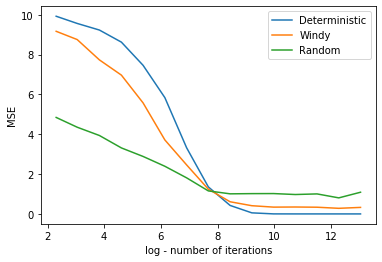

In [34]:
error_plot, = plt.plot(np.log(time_steps),error )
error_plot_wind, = plt.plot(np.log(time_steps_wind),error_wind)
error_plot_random, = plt.plot(np.log(time_steps_random), error_random)

plt.legend([error_plot, error_plot_wind,error_plot_random ], ['Deterministic', 'Windy', 'Random'])
plt.xlabel('log - number of iterations')
plt.ylabel('MSE')

## Challenging the algorithm: stopping before convergence

There  are  actually  plenty  of  situations  where  conducting  experimentsis expensive, and the users might need to interrupt the process or limit the number ofiterations, while still having a good estimation and a good policy.  What would happenwith Q-learning if someone needed to stop it before convergence ?  Could one still relyon the results ?  How bad would it be ?
Let's take one example: we are only able to conduct 500 iterations of the Q-learning algorithm.
We will compare the estimation of the $Q$ values and the policies.

In [14]:
Nit = 500 #number of iterations of the algorithm

### Deterministic scenario : 500 iterations

In [15]:
q_table500 = np.zeros([len(states),len(actions)])

for i in range(Nit):
    s = np.random.randint(1,len(states)+1) #initial state
    state_index = s-1

    epochs, penalties, rew = 0, 0, 0
    done = False

    for j in range(3):
        if np.random.uniform(0, 1) < epsilon:
            action_index = np.random.randint(0,len(actions)) # Explore action space
        else:
            action_index = np.argmax(q_table500[state_index]) # Exploit learned values

        u = actions[action_index]

        next_state, rew, done = env_step(s, u)
        next_state_index = next_state - 1

        old_value = q_table500[state_index, action_index]
        next_max = np.max(q_table500[next_state_index])

        new_value = (1 - alpha) * old_value + alpha * (rew + gamma * next_max)
        q_table500[state_index, action_index] = new_value

        if rew == -10:
            penalties += 1

        s = next_state
        state_index = s-1

        epochs += 1

print("Training finished.\n")

Training finished.



### Windy scenario : 500 iterations

In [16]:
q_table_wind500 = np.zeros([len(states),len(actions)])

for i in range(500):
    s = np.random.randint(1,len(states)+1) #initial state
    state_index = s-1
    
    epochs, penalties, rew = 0, 0, 0
    done = False
    
    for j in range(5):
        if np.random.uniform(0, 1) < epsilon:
            action_index = np.random.randint(0,len(actions)) # Explore action space
        else:
            action_index = np.argmax(q_table_wind500[state_index]) # Exploit learned values

        u = actions[action_index]

        next_state, rew, done = env_step_wind(s, u, w, f)
        next_state_index = next_state - 1
        
        old_value = q_table_wind500[state_index, action_index]
        next_max = np.max(q_table_wind500[next_state_index])

        new_value = (1 - alpha) * old_value + alpha * (rew + gamma * next_max)
        q_table_wind500[state_index, action_index] = new_value

        if rew == -10:
            penalties += 1

        s = next_state
        state_index = s-1

        epochs += 1

print("Training finished.\n")

Training finished.



### Very windy (random) scenario:500 iterations

In [17]:
q_table_random500 = np.zeros([len(states),len(actions)])

for i in range(500):
    s = np.random.randint(1,len(states)+1) #initial state
    state_index = s-1
    
    epochs, penalties, rew = 0, 0, 0
    done = False
    
    for j in range(5):
        if np.random.uniform(0, 1) < epsilon:
            action_index = np.random.randint(0,len(actions)) # Explore action space
        else:
            action_index = np.argmax(q_table_random500[state_index]) # Exploit learned values

        u = actions[action_index]

        next_state, rew, done = env_step_random(s, u, matrix1, matrix2, matrix3, matrix4)
        next_state_index = next_state - 1
        
        old_value = q_table_random500[state_index, action_index]
        next_max = np.max(q_table_random500[next_state_index])

        new_value = (1 - alpha) * old_value + alpha * (rew + gamma * next_max)
        q_table_random500[state_index, action_index] = new_value

        if rew == -10:
            penalties += 1

        s = next_state
        state_index = s-1

        epochs += 1

print("Training finished.\n")

Training finished.



### Error and policy differences

In [18]:
error500 = (np.mean((q_table500-q_dp)**2))**0.5
error_wind500 = (np.mean((q_table_wind500-q_dp_wind)**2))**0.5
error_random500 = (np.mean((q_table_random500-q_dp_random)**2))**0.5

In [19]:
print(error500)
print(error_wind500)
print(error_random500)

3.9657881001019586
2.7591287191473417
1.8593277983323746


In [46]:
def get_policy(q):
    return([actions[i] for i in np.argmax(q, axis = 1)])

In [56]:
get_policy(q_table_random500)

['haut',
 'gauche',
 'droite',
 'haut',
 'bas',
 'droite',
 'gauche',
 'haut',
 'droite']